Alright lets try and get deutsch's algorithm working. First we'll implement the algorithm for a simple case, then try to make it work when randomization is present (aka oracle is chosen for us. So for now, we'll use the simple constant 0 case, aka nothing is applied when the oracle is used. 

In [74]:
# RNG
import random
#Numpy
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
import time

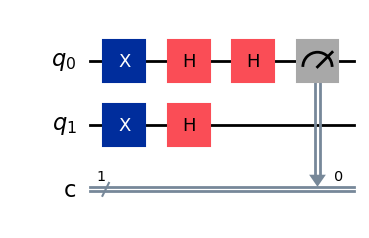

In [75]:
Deutch_Circuit = QuantumCircuit(2,1) # q0 input, q1 output. The comma then separates classical and quantum bits

#Setup, always the same given the oracle
Deutch_Circuit.x(0)
Deutch_Circuit.x(1)
Deutch_Circuit.h(0)
Deutch_Circuit.h(1)

#Oracle goes here

#Final Instructions before measurement
Deutch_Circuit.h(0)
Deutch_Circuit.measure(0,0) # First one to say which qubit to measure, second to see where it should be stored.
Deutch_Circuit.draw("mpl")

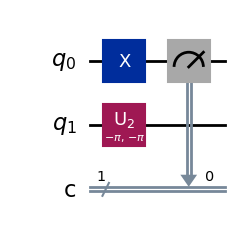

In [76]:
simulator = AerSimulator()
transpiled = transpile(Deutch_Circuit,simulator)
transpiled.draw("mpl")

{'1': 1024}


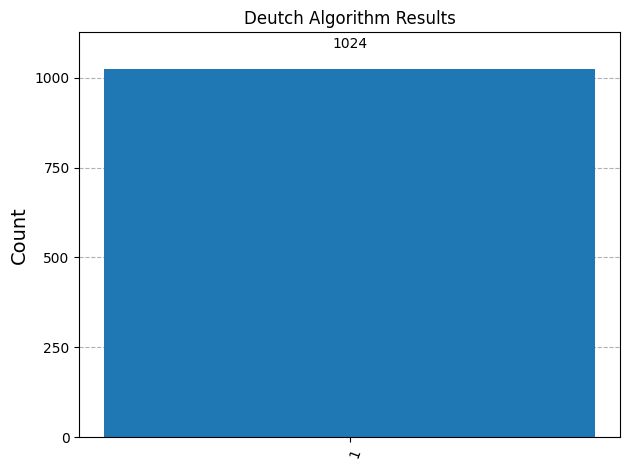

In [77]:
job = simulator.run(transpiled)
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts(), title="Deutch Algorithm Results")

Okay so, we have the algorithm working as intended, above we have a constant function, and the algorithm gave out 1 100% of the time. Now of course that is the simple case, we will now implement the oracle if given to us randomly. 

Debug, option is 2


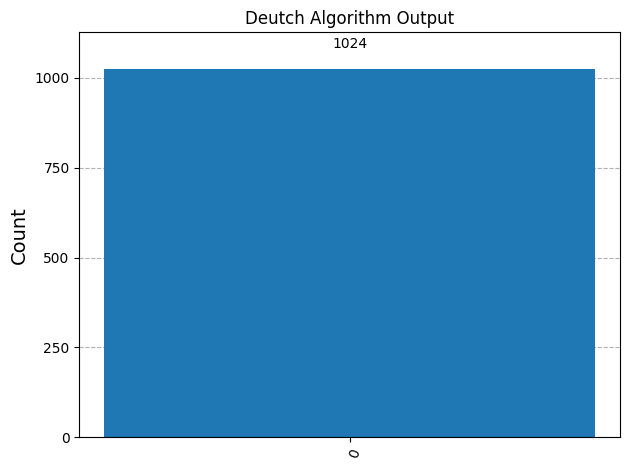

In [78]:
def Deutch_Oracle(circuit): #Will only work with a circuit with (2,1)
    option = random.randint(1,4)
    if option == 1: #Balanced, should be 1
        pass
    elif option == 2: #Constant, should be 0
        circuit.cx(0,1)
    elif option == 3: #Constant, should be 0
        circuit.x(1)
        circuit.cx(0,1)
    elif option == 4: #Balanced, should be 1
        circuit.x(1)
    print(f"Debug, option is {option}")

Deutch_Circuit = QuantumCircuit(2,1) # q0 input, q1 output. The comma then separates classical and quantum bits

#Setup, always the same given the oracle
Deutch_Circuit.x(0)
Deutch_Circuit.x(1)
Deutch_Circuit.h(0)
Deutch_Circuit.h(1)

#Oracle goes here
Deutch_Oracle(Deutch_Circuit)


#Final Instructions before measurement
Deutch_Circuit.h(0)
Deutch_Circuit.measure(0,0) # First one to say which qubit to measure, second to see where it should be stored.
Deutch_Circuit.draw("mpl")

tranpiled = transpile(Deutch_Circuit,simulator)
results = simulator.run(Deutch_Circuit).result()
plot_histogram(results.get_counts(), title= "Deutch Algorithm Output")

There we go, Deutch's Algorithm implemented into Qiskit. This one wasn't that bad and I used the instructions in Quantum Computer Science by Mermin. Typically, we'll have the theory layed out before the problem is mapped and actually run, so this was just practice to see if I could do this properly. 